# Exploratory Data Analysis

___

### Table Of Contents

1. Import libraries as needed
2. Expand maximum range of rows
3. Import athleisure dataset
4. Find total volume per engine
5. Find average search volume each month across all engines
6. Find average volume for each keyword on each search engine
7. Find average volume for each keyword across all search engines
8. Find total volume for each keyword across all search engines
9. Wordclouds for athleisure search volume
10. PDF and CDF for an athleisure keyword having a total search volume

___

### 1. Import libraries as needed

In [104]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random

___

### 2. Expand maximum range of rows

May be a good idea to expand the maximum range of rows to view in your Pandas dataframes.<br>
Use <b>pd.set_option()</b>

In [2]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

___

### 3. Import athleisure dataset

In [175]:
df = pd.read_csv("/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/athleisure.csv")
df.head()

,Unnamed: 0,keyword,volume,year,month,engine,total_volume_for_last_12_months,avg_volume_for_last_12_months,total_months_seen,month_abbr
0,0,yoga pants,61,2018,6,google,779,65,12,Jun
1,1,yoga pants,68,2018,7,google,779,65,12,Jul
2,2,yoga pants,107,2018,8,google,779,65,12,Aug
3,3,yoga pants,63,2018,9,google,779,65,12,Sep
4,4,yoga pants,72,2018,10,google,779,65,12,Oct


___

### 4. Find total volume per engine

In [39]:
#load .csv files - previously created from Wordtracker API calls

total_volume_usa_google = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/google_stats.csv')
total_volume_usa_youtube = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/youtube_stats.csv')
total_volume_usa_amazon = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/amazon_stats.csv')

In [40]:
#concat all 3 dataframes into 1

total_volume_usa = pd.concat([total_volume_usa_google, total_volume_usa_youtube, total_volume_usa_amazon])

In [41]:
#only show what we care about - sum, engine, and country

total_volume_usa = total_volume_usa.drop(['max', 'count', 'avg', 'volume'], axis=1)
total_volume_usa = total_volume_usa.sort_values('engine', ascending=True)
total_volume_usa

,sum,engine,country_code
0,11653715,amazon,US
0,594234483,google,US
0,60508218,youtube,US


#### Plot total volume across all 3 search engines

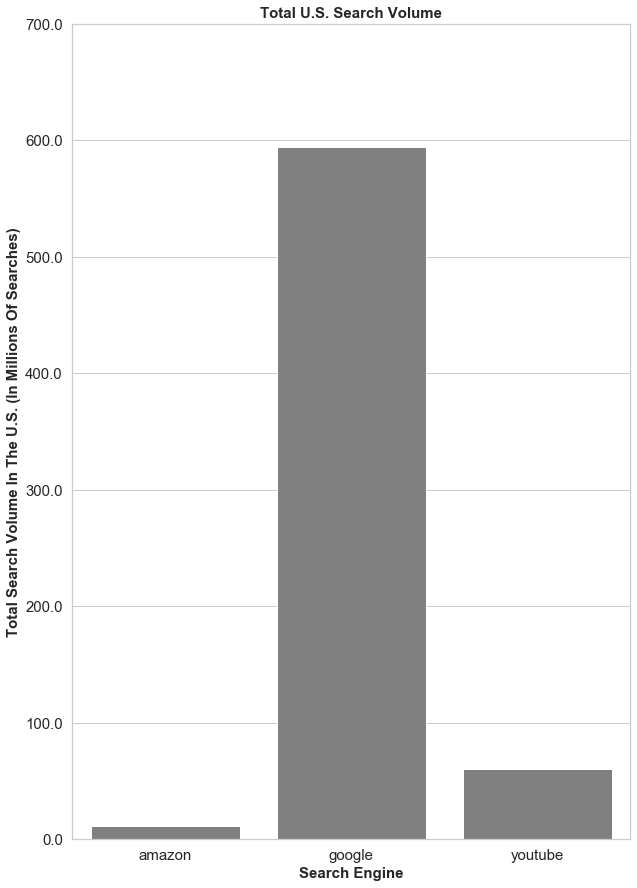

In [170]:
#barplot of total search volume across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="sum", ci=None, color='grey', data=total_volume_usa)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Total Search Volume In The U.S. (In Millions Of Searches)', fontsize=15, weight = 'bold')
plt.title('Total U.S. Search Volume', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, rotation=0)
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.show()

#### Initial Observations

Between the 3 search engines, <b>Google clearly has the vastest total U.S. search volume compared to YouTube and Amazon.</b> Google's U.S. search volume (about 600 million) in the Wordtracker database is approximately 10x larger than YouTube (about 60 million), and 50x larger than Amazon (about 12 million). Based on this, we might guess that Google will have the largest search volumes for each "athleisure" related keyword, just because of its sheer volume.

#### Plot total volume for ATHLEISURE KEYWORDS ONLY across all 3 search engines

In [66]:
total_volume_keywords_usa = pd.DataFrame(df.groupby('engine').volume.sum())
total_volume_keywords_usa = total_volume_keywords_usa.reset_index()

In [67]:
total_volume_keywords_usa.sort_values('engine', ascending=True)

,engine,volume
0,amazon,3112204
1,google,66634
2,youtube,3995449


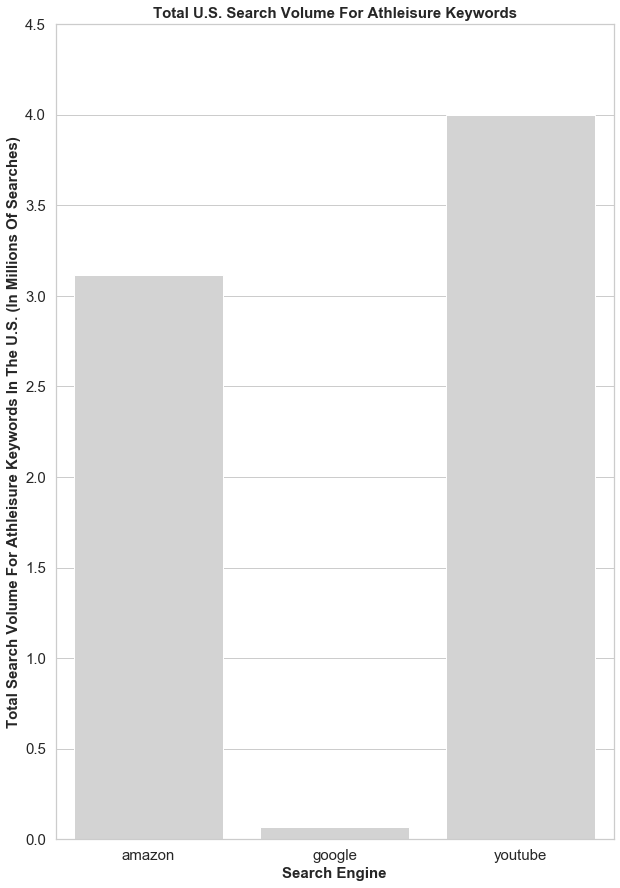

In [169]:
#barplot of total search volume for our 77 keywords only across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="volume", ci=None, color='lightgrey', data=total_volume_keywords_usa)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Total Search Volume For Athleisure Keywords In The U.S. (In Millions Of Searches)', fontsize=15, weight = 'bold')
plt.title('Total U.S. Search Volume For Athleisure Keywords', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, rotation=0)
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.show()

#### Initial Observations

Between the 3 search engines, <b>even though Google has the largest search volume compared to YouTube and Amazon, Google has the SMALLEST search volume for "athleisure" related keywords, by a significant margin.</b> For athleisure related keywords, Google only has a meager 67,000 searches in the U.S., whereas Amazon has over 3 million searches, and YouTube has nearly 4 million searches! Based on this finding, it seems that overall search engine volume does not always influence the volume of searching a particular topic. People may be searching more for athleisure related keywords on Amazon and Youtube, much more than on Google, even though Google gets more search volume in general.

In [64]:
athleisure_search_ratio = list(total_volume_keywords_usa['volume'] / total_volume_usa['sum'])
# for some reason 2 "NaN" values showed up - need to .pop() those values away.
# athleisure_search_ratio.pop()
# athleisure_search_ratio.pop()
athleisure_search_ratio

[0.2670568140717359, 0.00523733322288535, 0.05143440185265413]

In [68]:
search_ratio_df = pd.merge(total_volume_keywords_usa, total_volume_usa)
search_ratio_df

,engine,volume,sum,country_code
0,amazon,3112204,11653715,US
1,google,66634,594234483,US
2,youtube,3995449,60508218,US


In [69]:
search_ratio_df['ratio'] = athleisure_search_ratio
search_ratio_df

,engine,volume,sum,country_code,ratio
0,amazon,3112204,11653715,US,0.267057
1,google,66634,594234483,US,0.005237
2,youtube,3995449,60508218,US,0.051434


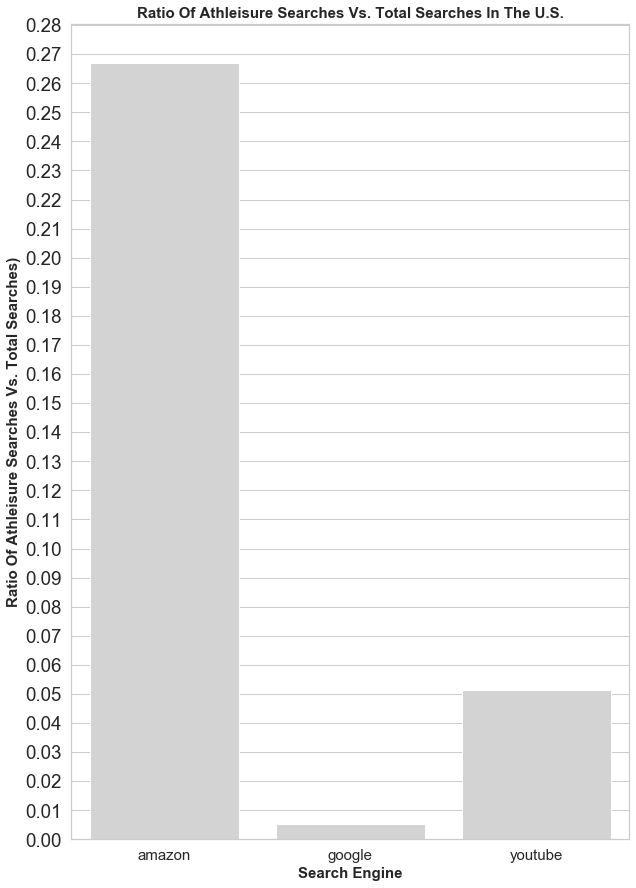

In [76]:
#barplot of total search volume for our 77 keywords only across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="ratio", ci=None, color='lightgrey', data=search_ratio_df)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Ratio Of Athleisure Searches Vs. Total Searches)', fontsize=15, weight = 'bold')
plt.title('Ratio Of Athleisure Searches Vs. Total Searches In The U.S.', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.01))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

#### Initial Observations

Between the 3 search engines, <b>Google has the SMALLEST search ratio for "athleisure" related keywords, while Amazon has the HIGHEST search ratio.</b> "Athleisure" related keywords only represent 0.5% of all Google searches in the U.S., 5% of all YouTube searches in the U.S., and nearly 27% of all Amazon searches in the U.S.! Again, this reinforces the theory that perhaps overall search engine volume does not always influence the volume of searching a particular topic. People may be searching more for athleisure related keywords on Amazon and Youtube, much more than on Google, even though Google gets more search volume in general.

___

### 5. Find average search volume each month across all engines

#### Get DataFrames for each month separately

In [4]:
df_1 = df.loc[df['month']==1]
df_2 = df.loc[df['month']==2]
df_3 = df.loc[df['month']==3]
df_4 = df.loc[df['month']==4]
df_5 = df.loc[df['month']==5]
df_6 = df.loc[df['month']==6]
df_7 = df.loc[df['month']==7]
df_8 = df.loc[df['month']==8]
df_9 = df.loc[df['month']==9]
df_10 = df.loc[df['month']==10]
df_11 = df.loc[df['month']==11]
df_12 = df.loc[df['month']==12]

dfs_by_month = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]

In [5]:
means = []
for df in dfs_by_month:
    means.append(df['volume'].mean())

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [7]:
means

[3250.9583333333335,
 3286.5046296296296,
 2351.0694444444443,
 1971.4398148148148,
 1977.6759259259259,
 2702.865740740741,
 2727.3935185185187,
 2428.527777777778,
 2697.722222222222,
 2426.25,
 3531.1111111111113,
 3862.7731481481483]

In [8]:
months_and_means = {'month': months, 'mean': means}
means_by_month = pd.DataFrame(data=months_and_means)
display(means_by_month)
display(means_by_month.describe())

,month,mean
0,Jan,3250.958333
1,Feb,3286.504630
2,Mar,2351.069444
3,Apr,1971.439815
4,May,1977.675926
5,Jun,2702.865741
6,Jul,2727.393519
7,Aug,2428.527778
8,Sep,2697.722222
9,Oct,2426.250000


,mean
count,12.000000
mean,2767.857639
std,599.907456
min,1971.439815
25%,2407.454861
50%,2700.293981
75%,3259.844907
max,3862.773148


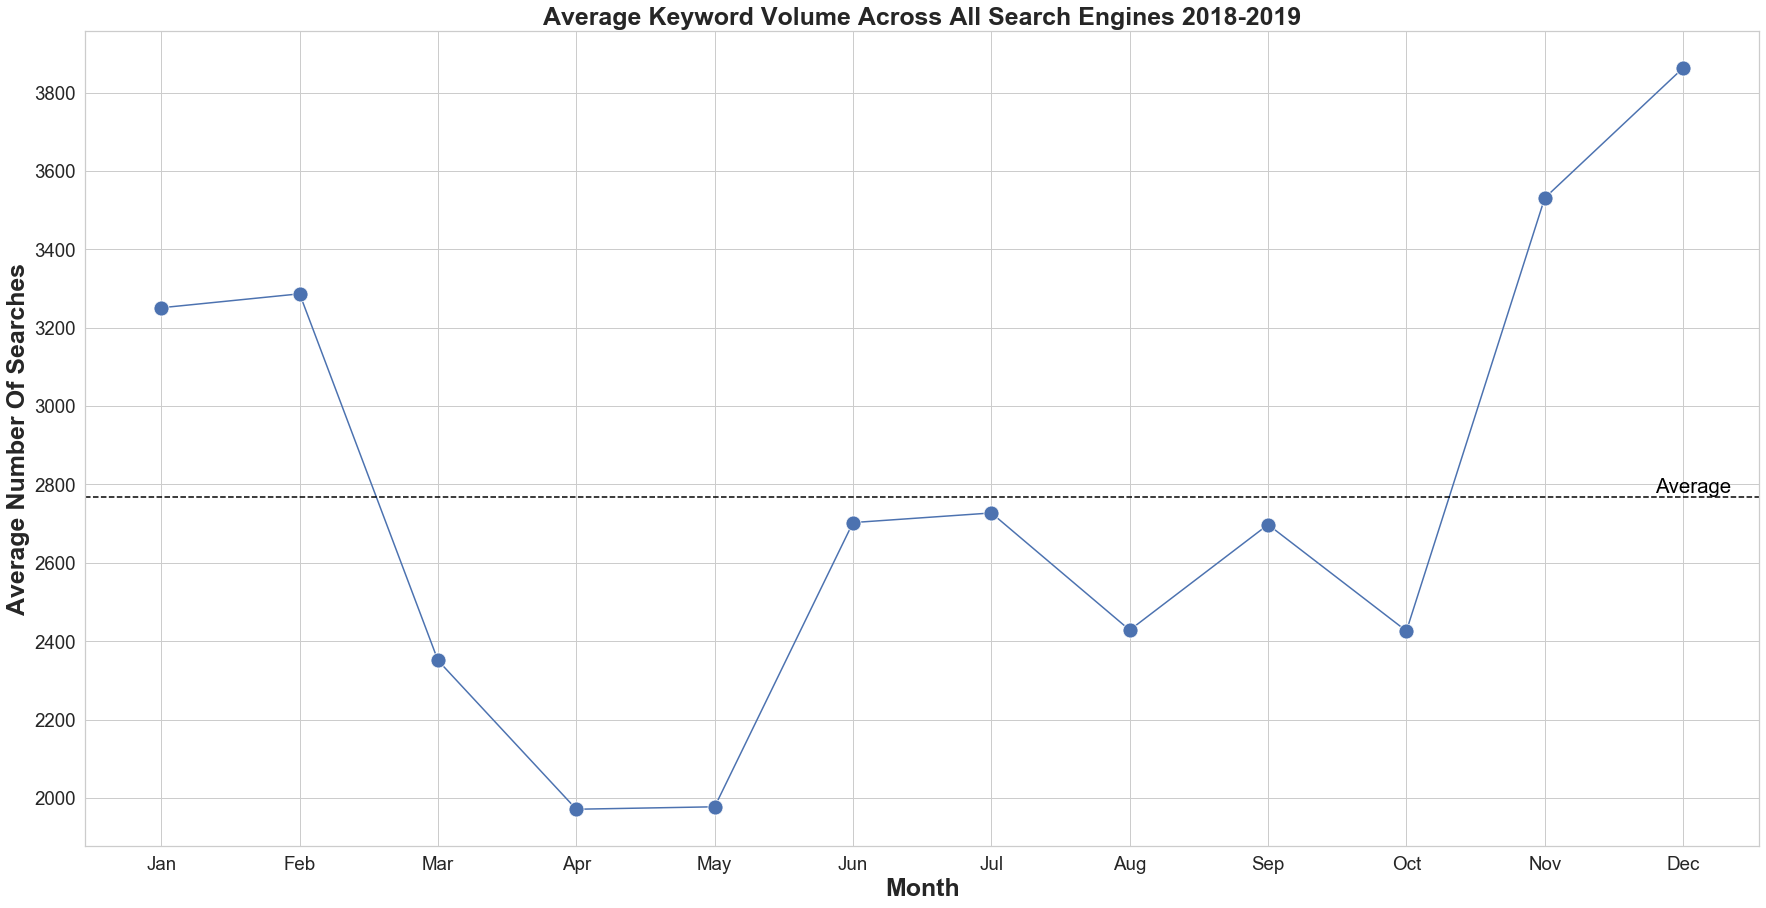

In [45]:
#lineplot of average volumes by month for all selected keywords aggregated across all 3 search engines
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.lineplot(x="month", y="mean", marker="o", ci=0, markersize=15, data=means_by_month, sort=False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Average Keyword Volume Across All Search Engines 2018-2019', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches', fontsize=25, weight = 'bold')
plt.xlabel('Month', fontsize=25, weight = 'bold')
ax.axhline(2767.857639, ls='--', color='black')
ax.text(10.8,2780, "Average", color='black')
plt.show()

#### Initial Observations

Across all 3 search engines, the plot suggests that the <b>colder months</b> in the United States have the highest average number of searches regarding "athleisure" related keywords. This includes the months of January, February, November, and December. December is the maximum at an average of 3862 athleisure related searches. June is the minimum with 0 athleisure related searches. The average number of searches across all 3 search engines is about 2767 searches in any given month.

___

### 6. Find average volume for each keyword on each search engine

#### Average volume per keyword on Google

In [78]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "google" only.
df_unique_keywords_google = df_unique_keywords[df_unique_keywords.engine == 'google']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_google = df_unique_keywords_google.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_google

,keyword,avg_volume_for_last_12_months,engine
0,yoga pants,65,google
12,sweatpants,62,google
24,sweatshirt,288,google
108,crew neck,29,google
120,thumb hole,1,google
132,pullover,19,google
144,fleece,62,google
156,joggers,110,google
168,hoodie,157,google
180,hooded,35,google


#### Renumber index

In [162]:
df_unique_keywords_google = df_unique_keywords_google.reset_index(drop=True)
df_unique_keywords_google = df_unique_keywords_google.sort_values('avg_volume_for_last_12_months', ascending=False)
df_unique_keywords_google

,keyword,avg_volume_for_last_12_months,engine
76,core,575,google
75,movement,559,google
74,stripe,530,google
73,cotton,296,google
72,sweatshirt,288,google
71,running,242,google
70,flex,229,google
69,athletic,224,google
68,striped,188,google
67,hoodie,157,google


In [163]:
display(df_unique_keywords_google.describe())
display(df_unique_keywords_google.min())
display(df_unique_keywords_google.max())

,avg_volume_for_last_12_months
count,77.000000
mean,74.350649
std,118.716687
min,1.000000
25%,7.000000
50%,29.000000
75%,71.000000
max,575.000000


keyword                          3 stripes
avg_volume_for_last_12_months            1
engine                              google
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months           575
engine                               google
dtype: object

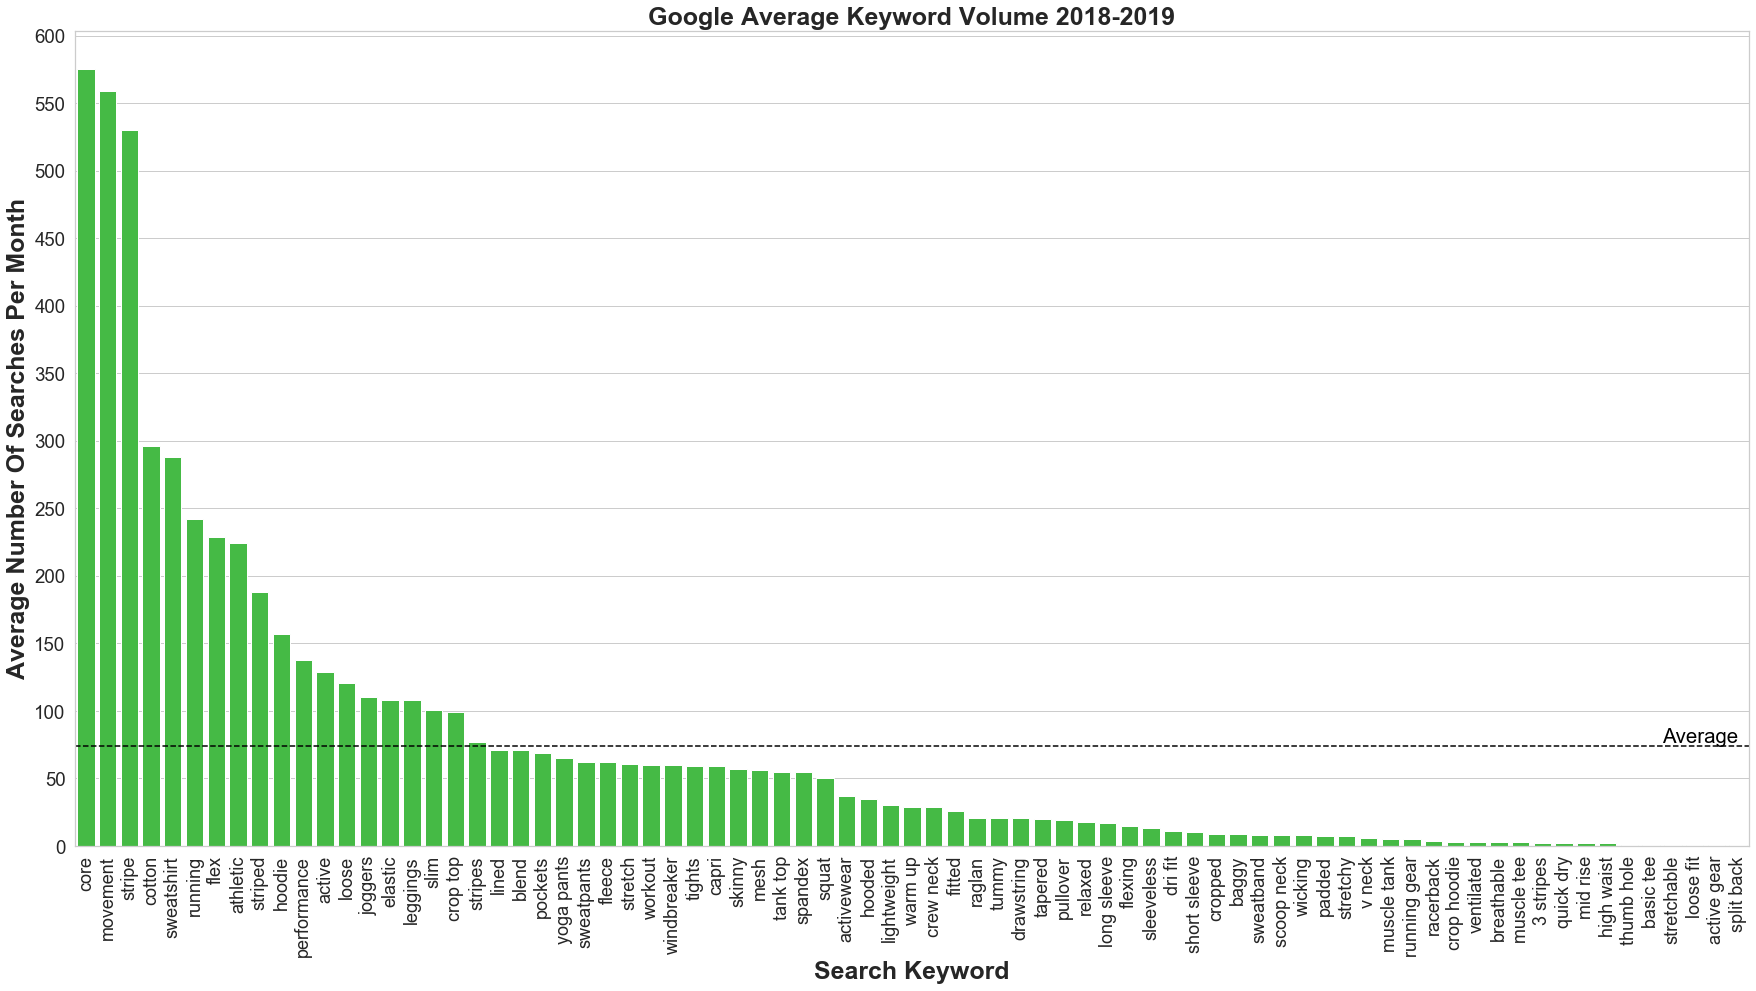

In [164]:
#barplot of average keyword volumes on Google
#find colors here: https://python-graph-gallery.com/196-select-one-color-with-matplotlib/

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='limegreen', data=df_unique_keywords_google)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Google Average Keyword Volume 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(74.350649, ls='--', color='black')
ax.text(72.5,77, "Average", color='black')
plt.show()

#### Initial Observations

Given that the Wordtracker database has nearly 600 million Google searches for the United States, it is a bit surprising to see that the maximum average for any given athleisure related keyword in our study is less than 600 searches, and not in the thousands. The average number of athleisure related searches is only about 74 searches per month on Google. The plot shows that there are several outstanding keywords related to athleisure. <b>"Core"</b> is the maximum with an average of 575 searches per month. The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0, including: <b>"thumb hole"</b>, <b>"basic tee"</b>, <b>"stretchable"</b>, <b>"loose fit"</b>, and <b>"active gear"</b>.

#### Average volume per keyword on YouTube

In [108]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "youtube" only.
df_unique_keywords_youtube = df_unique_keywords[df_unique_keywords.engine == 'youtube']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_youtube = df_unique_keywords_youtube.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_youtube

,keyword,avg_volume_for_last_12_months,engine
36,yoga pants,1031,youtube
48,sweatpants,1785,youtube
60,sweatshirt,69710,youtube
228,thumb hole,1,youtube
240,pullover,14,youtube
252,fleece,24,youtube
264,hoodie,76026,youtube
276,hooded,29,youtube
288,capri,2,youtube
300,muscle tee,1,youtube


#### Renumber index

In [159]:
df_unique_keywords_youtube = df_unique_keywords_youtube.reset_index(drop=True)
df_unique_keywords_youtube = df_unique_keywords_youtube.sort_values('avg_volume_for_last_12_months', ascending=False)
df_unique_keywords_youtube

,keyword,avg_volume_for_last_12_months,engine
65,hoodie,76026,youtube
64,sweatshirt,69710,youtube
63,running,55537,youtube
62,flex,31618,youtube
61,workout,20837,youtube
60,cotton,18547,youtube
59,performance,11027,youtube
58,slim,7622,youtube
57,skinny,5960,youtube
56,movement,5046,youtube


In [160]:
display(df_unique_keywords_youtube.describe())
display(df_unique_keywords_youtube.min())
display(df_unique_keywords_youtube.max())

,avg_volume_for_last_12_months
count,66.000000
mean,5044.909091
std,14751.237507
min,0.000000
25%,1.000000
50%,26.500000
75%,1878.000000
max,76026.000000


keyword                          3 stripes
avg_volume_for_last_12_months            0
engine                             youtube
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months         76026
engine                              youtube
dtype: object

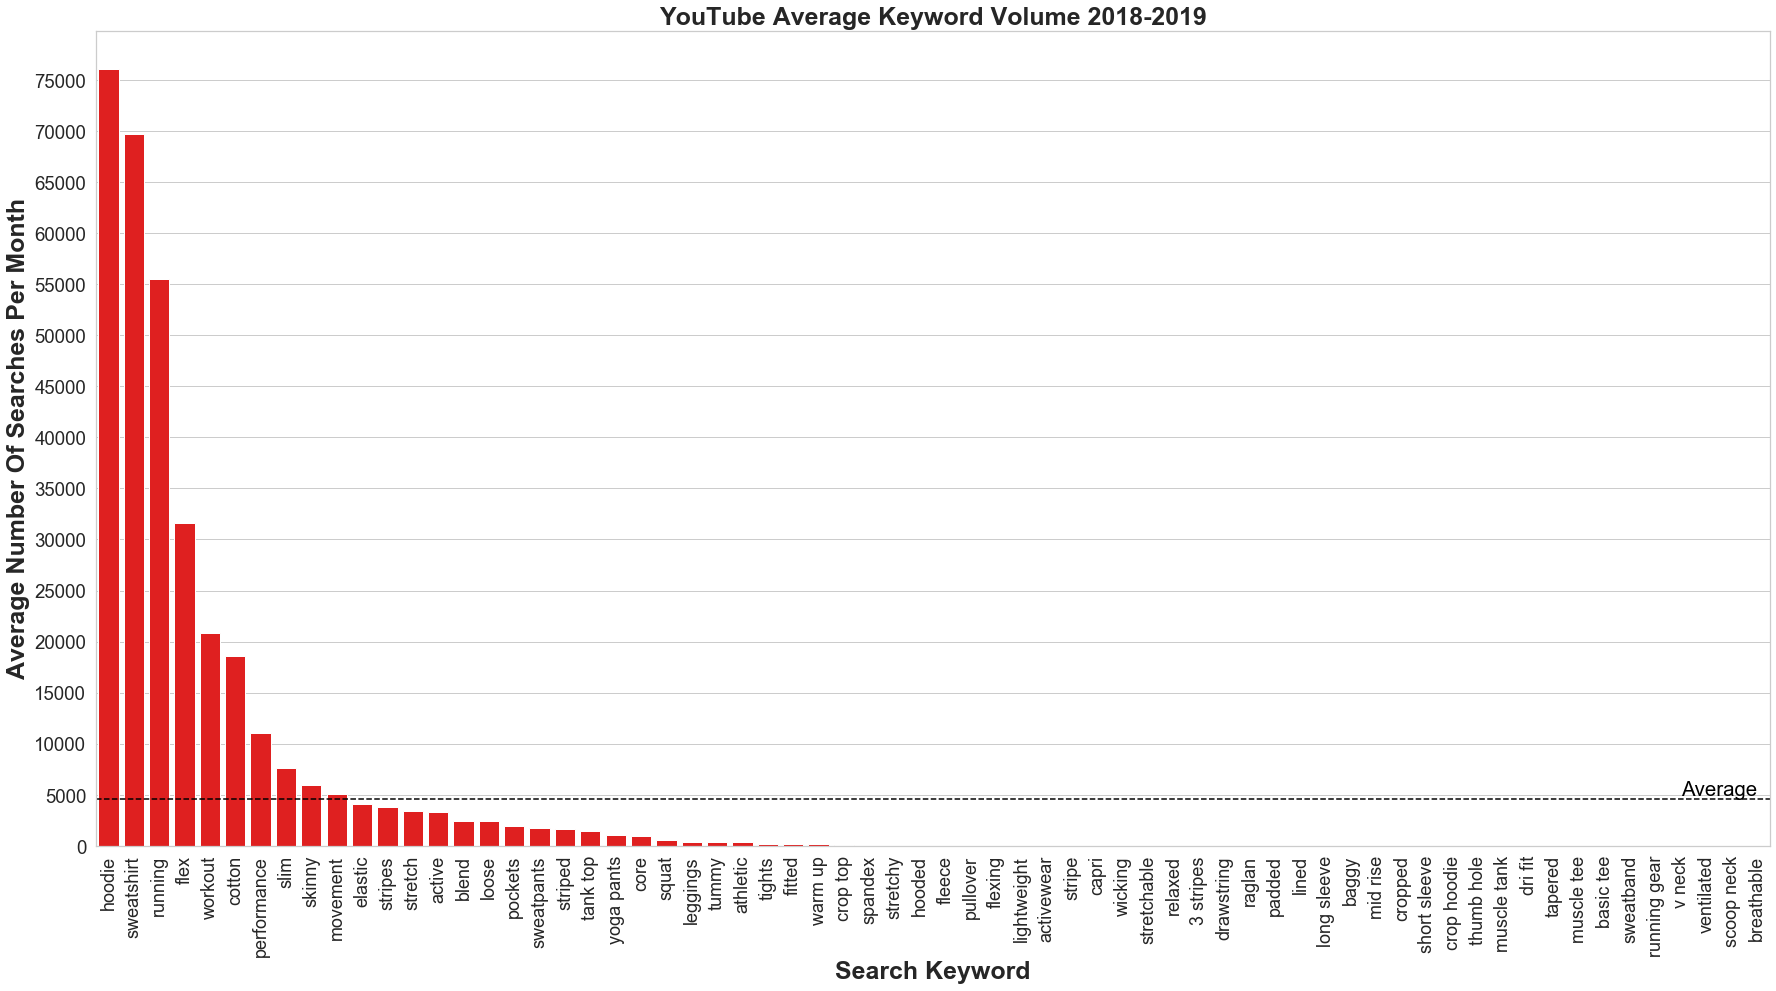

In [161]:
#barplot of average keyword volumes on YouTube

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='red', data=df_unique_keywords_youtube)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('YouTube Average Keyword Volume 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(4629.530303, ls='--', color='black')
ax.text(62,5000, "Average", color='black')
plt.show()

#### Initial Observations

The results for YouTube are very surprising compared to the plot of average keyword volume for Google searches. <b>Average search volume for "athleisure" related terms is much higher on YouTube than Google.</b> The average number of athleisure related searches per month is a whooping 4630 on YouTube, compared to a tiny 74 searches per month on Google! The plot shows dramatically high-performing keywords related to athleisure. <b>"Hoodie"</b> is the maximum with an average of 69,691 searches per month. The keywords: <b>"sweatshirt"</b> and <b>"running"</b> also have very high search volume averages.  The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0 here, just like Google searches.

#### Average volume per keyword on Amazon

In [112]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "amazon" only.
df_unique_keywords_amazon = df_unique_keywords[df_unique_keywords.engine == 'amazon']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_amazon = df_unique_keywords_amazon.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_amazon

,keyword,avg_volume_for_last_12_months,engine
72,yoga pants,7731,amazon
84,sweatpants,10977,amazon
96,sweatshirt,9553,amazon
324,crew neck,180,amazon
336,thumb hole,33,amazon
348,pullover,1442,amazon
360,fleece,4317,amazon
372,joggers,19603,amazon
384,hoodie,31552,amazon
396,hooded,974,amazon


#### Renumber index

In [166]:
df_unique_keywords_amazon = df_unique_keywords_amazon.reset_index(drop=True)
df_unique_keywords_amazon = df_unique_keywords_amazon.sort_values('avg_volume_for_last_12_months', ascending=False)
df_unique_keywords_amazon

,keyword,avg_volume_for_last_12_months,engine
71,workout,35410,amazon
70,hoodie,31552,amazon
69,leggings,21195,amazon
68,joggers,19603,amazon
67,running,13204,amazon
66,slim,10987,amazon
65,sweatpants,10977,amazon
64,sweatshirt,9553,amazon
63,long sleeve,8276,amazon
62,cotton,8018,amazon


In [167]:
display(df_unique_keywords_amazon.describe())
display(df_unique_keywords_amazon.min())
display(df_unique_keywords_amazon.max())

,avg_volume_for_last_12_months
count,72.000000
mean,3601.902778
std,6688.280781
min,3.000000
25%,157.750000
50%,847.500000
75%,4290.750000
max,35410.000000


keyword                          active
avg_volume_for_last_12_months         3
engine                           amazon
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months         35410
engine                               amazon
dtype: object

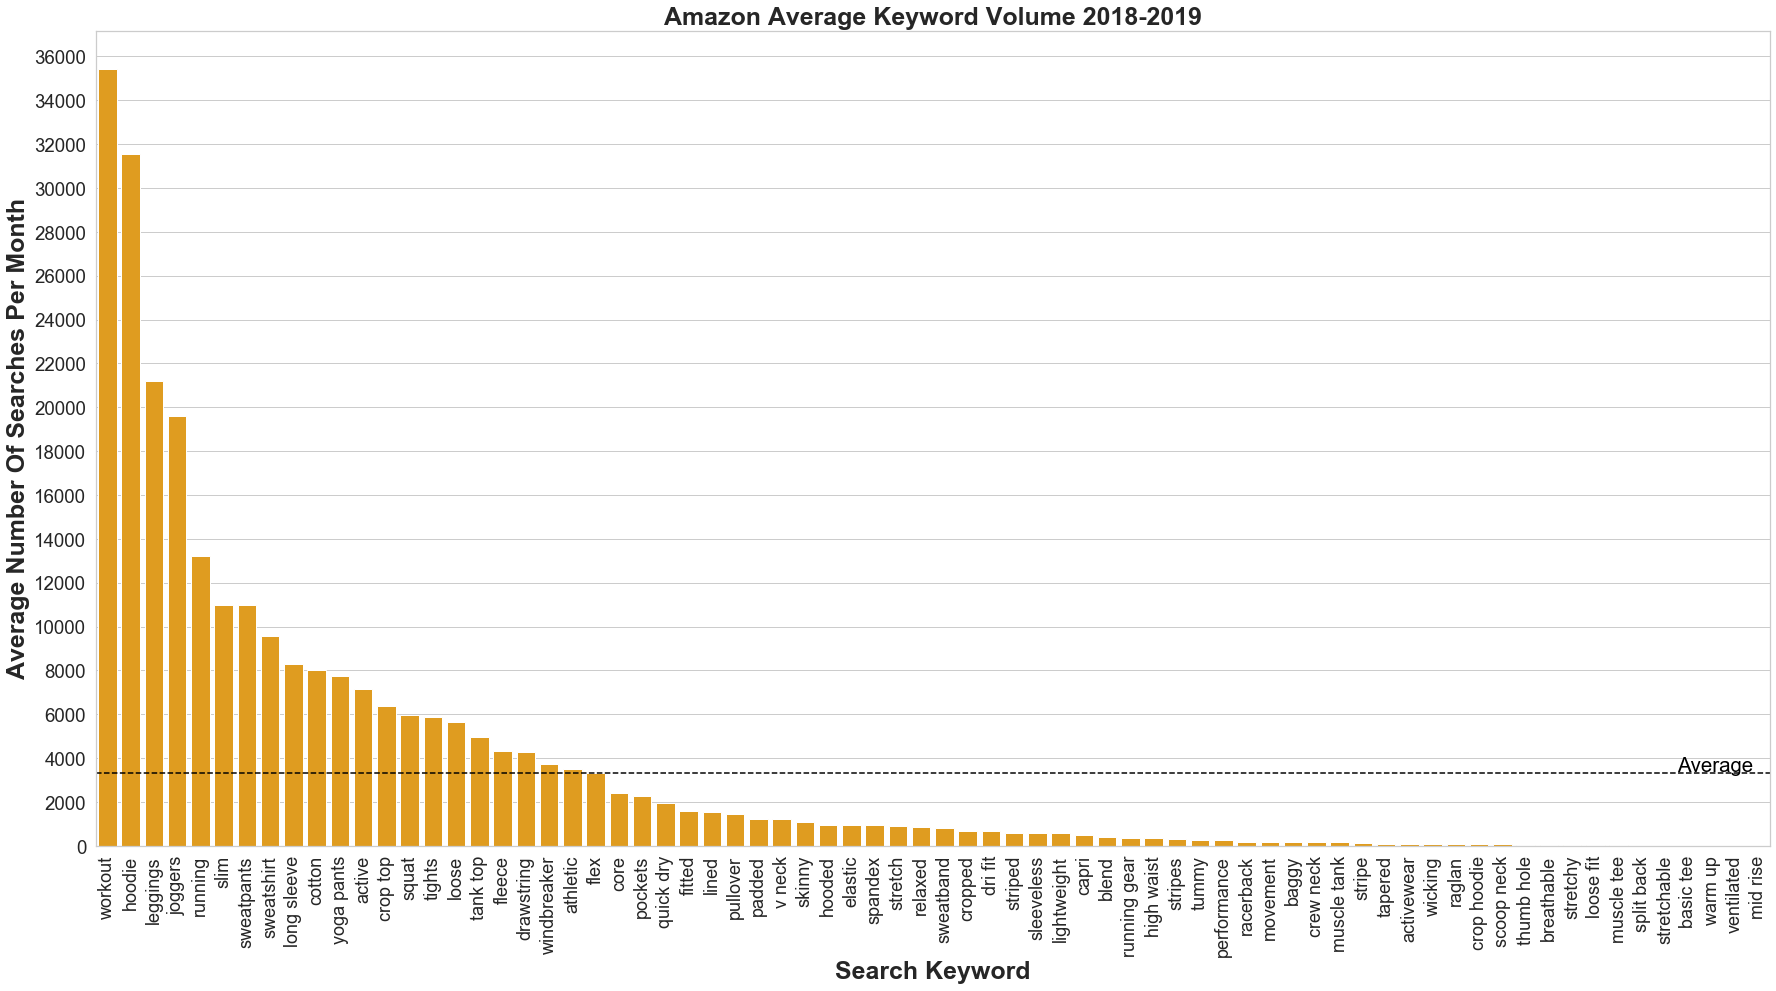

In [168]:
#barplot of average keyword volumes on Amazon

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='orange', data=df_unique_keywords_amazon)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Amazon Average Keyword Volume 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(3307.652778, ls='--', color='black')
ax.text(67.5,3400, "Average", color='black')
plt.show()

#### Initial Observations

The results for Amazon are also very surprising compared to Google. <b>Average search volume for "athleisure" related terms is much higher on Amazon than Google, but less than YouTube.</b> The average number of athleisure related searches per month on Amazon is 3307, which is less than 4630 per month on YouTube, and much more than 74 searches per month on Google. Like YouTube, the Amazon plot above shows some very high-performing keywords related to athleisure. <b>"Workout"</b> is the maximum with an average of 32,460 searches per month. <b>"Hoodie"</b> is a close second, with <b>"leggings"</b> and <b>"joggers"</b> also at high search volume averages. The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0 here, just like Google and YouTube searches.

___

### 7. Find average volume for each keyword across all search engines

#### Average volume per keyword across all search engines

In [263]:
all_engines_1 = df_unique_keywords_google.merge(df_unique_keywords_youtube, on='keyword', how='outer')
all_engines = all_engines_1.merge(df_unique_keywords_amazon, on='keyword', how='outer')
all_engines = all_engines.fillna(0)
all_engines

,keyword,avg_volume_for_last_12_months_x,engine_x,avg_volume_for_last_12_months_y,engine_y,avg_volume_for_last_12_months,engine
0,core,575,google,964.0,youtube,2416.0,amazon
1,movement,559,google,5046.0,youtube,193.0,amazon
2,stripe,530,google,2.0,youtube,112.0,amazon
3,cotton,296,google,18547.0,youtube,8018.0,amazon
4,sweatshirt,288,google,69710.0,youtube,9553.0,amazon
5,running,242,google,55537.0,youtube,13204.0,amazon
6,flex,229,google,31618.0,youtube,3343.0,amazon
7,athletic,224,google,343.0,youtube,3496.0,amazon
8,striped,188,google,1662.0,youtube,601.0,amazon
9,hoodie,157,google,76026.0,youtube,31552.0,amazon


In [264]:
all_engines['avg_volume_all_engines'] = all_engines['avg_volume_for_last_12_months_x'] + all_engines['avg_volume_for_last_12_months_y'] + all_engines['avg_volume_for_last_12_months']
all_engines['avg_volume_all_engines'] = all_engines['avg_volume_all_engines']/3
all_engines

,keyword,avg_volume_for_last_12_months_x,engine_x,avg_volume_for_last_12_months_y,engine_y,avg_volume_for_last_12_months,engine,avg_volume_all_engines
0,core,575,google,964.0,youtube,2416.0,amazon,1318.333333
1,movement,559,google,5046.0,youtube,193.0,amazon,1932.666667
2,stripe,530,google,2.0,youtube,112.0,amazon,214.666667
3,cotton,296,google,18547.0,youtube,8018.0,amazon,8953.666667
4,sweatshirt,288,google,69710.0,youtube,9553.0,amazon,26517.000000
5,running,242,google,55537.0,youtube,13204.0,amazon,22994.333333
6,flex,229,google,31618.0,youtube,3343.0,amazon,11730.000000
7,athletic,224,google,343.0,youtube,3496.0,amazon,1354.333333
8,striped,188,google,1662.0,youtube,601.0,amazon,817.000000
9,hoodie,157,google,76026.0,youtube,31552.0,amazon,35911.666667


In [265]:
del all_engines['avg_volume_for_last_12_months_x']
del all_engines['avg_volume_for_last_12_months_y']
del all_engines['avg_volume_for_last_12_months']
del all_engines['engine_x']
del all_engines['engine_y']
del all_engines['engine']
all_engines

,keyword,avg_volume_all_engines
0,core,1318.333333
1,movement,1932.666667
2,stripe,214.666667
3,cotton,8953.666667
4,sweatshirt,26517.000000
5,running,22994.333333
6,flex,11730.000000
7,athletic,1354.333333
8,striped,817.000000
9,hoodie,35911.666667


In [266]:
all_engines = all_engines.sort_values('avg_volume_all_engines', ascending=False)
all_engines

,keyword,avg_volume_all_engines
9,hoodie,35911.666667
4,sweatshirt,26517.000000
5,running,22994.333333
26,workout,18769.000000
6,flex,11730.000000
3,cotton,8953.666667
15,leggings,7228.000000
13,joggers,6571.000000
16,slim,6236.666667
23,sweatpants,4274.666667


In [275]:
all_engines.describe()

,avg_volume_all_engines
count,77.000000
mean,2588.857143
std,6101.677674
min,0.333333
25%,43.666667
50%,347.333333
75%,2056.000000
max,35911.666667


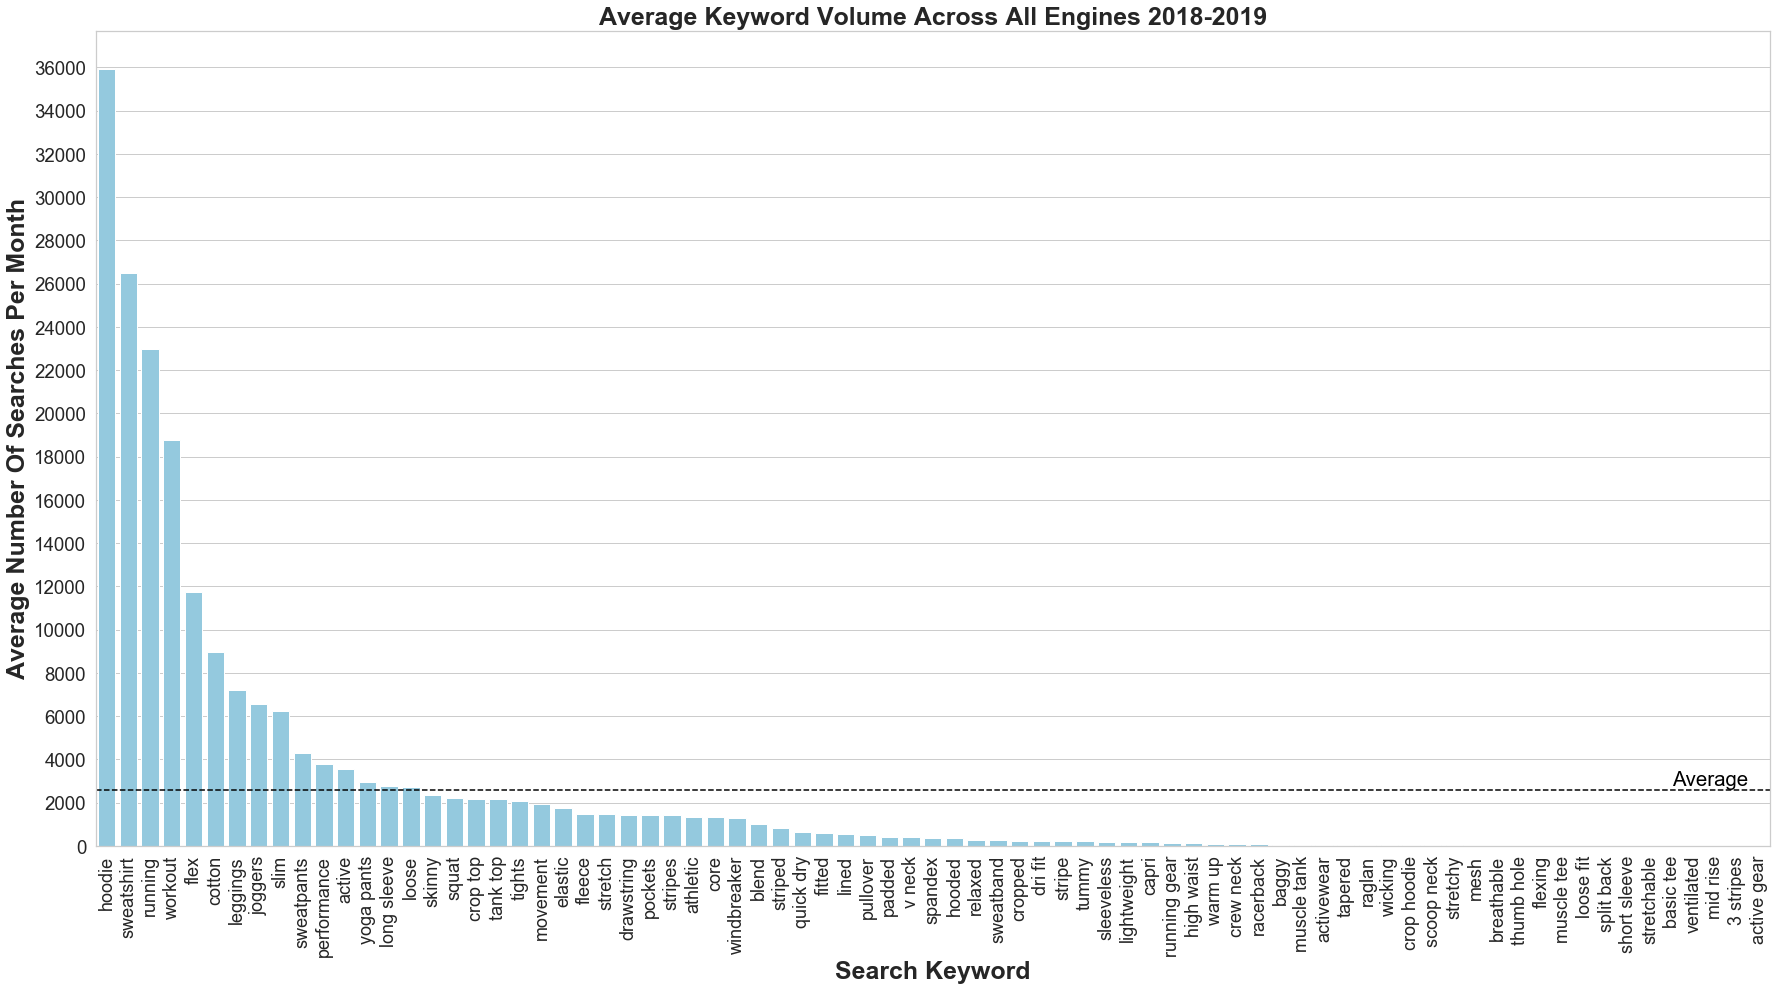

In [278]:
#barplot of AVERAGE keyword volumes across all 3 engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_all_engines", ci=None, color='skyblue', data=all_engines)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Average Keyword Volume Across All Engines 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(2588.857143, ls='--', color='black')
ax.text(72,2800, "Average", color='black')
plt.show()

### 8. Find total volume for each keyword across all search engines

#### Total volume per keyword across all search engines

In [308]:
df_unique_keywords_total = df[['keyword', 'total_volume_for_last_12_months', 'engine']].copy()

df_unique_keywords_total_google = df_unique_keywords_total[df_unique_keywords_total.engine == 'google']
df_unique_keywords_total_google = df_unique_keywords_total_google.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_total_youtube = df_unique_keywords_total[df_unique_keywords_total.engine == 'youtube']
df_unique_keywords_total_youtube = df_unique_keywords_total_youtube.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_total_amazon = df_unique_keywords_total[df_unique_keywords_total.engine == 'amazon']
df_unique_keywords_total_amazon = df_unique_keywords_total_amazon.drop_duplicates(subset='keyword', keep="first")

In [309]:
total_engines_1 = df_unique_keywords_total_google.merge(df_unique_keywords_total_youtube, on='keyword', how='outer')
total_engines = total_engines_1.merge(df_unique_keywords_total_amazon, on='keyword', how='outer')
total_engines = total_engines.fillna(0)
total_engines

,keyword,total_volume_for_last_12_months_x,engine_x,total_volume_for_last_12_months_y,engine_y,total_volume_for_last_12_months,engine
0,yoga pants,779,google,12380.0,youtube,92782.0,amazon
1,sweatpants,750,google,21420.0,youtube,131726.0,amazon
2,sweatshirt,3455,google,836526.0,youtube,114641.0,amazon
3,crew neck,353,google,0.0,0,2151.0,amazon
4,thumb hole,4,google,1.0,youtube,385.0,amazon
5,pullover,227,google,169.0,youtube,17303.0,amazon
6,fleece,740,google,279.0,youtube,51804.0,amazon
7,joggers,1320,google,0.0,0,235238.0,amazon
8,hoodie,1883,google,912316.0,youtube,378631.0,amazon
9,hooded,419,google,357.0,youtube,11695.0,amazon


In [310]:
total_engines['total_volume_all_engines'] = total_engines['total_volume_for_last_12_months_x'] + total_engines['total_volume_for_last_12_months_y'] + total_engines['total_volume_for_last_12_months']
total_engines

,keyword,total_volume_for_last_12_months_x,engine_x,total_volume_for_last_12_months_y,engine_y,total_volume_for_last_12_months,engine,total_volume_all_engines
0,yoga pants,779,google,12380.0,youtube,92782.0,amazon,105941.0
1,sweatpants,750,google,21420.0,youtube,131726.0,amazon,153896.0
2,sweatshirt,3455,google,836526.0,youtube,114641.0,amazon,954622.0
3,crew neck,353,google,0.0,0,2151.0,amazon,2504.0
4,thumb hole,4,google,1.0,youtube,385.0,amazon,390.0
5,pullover,227,google,169.0,youtube,17303.0,amazon,17699.0
6,fleece,740,google,279.0,youtube,51804.0,amazon,52823.0
7,joggers,1320,google,0.0,0,235238.0,amazon,236558.0
8,hoodie,1883,google,912316.0,youtube,378631.0,amazon,1292830.0
9,hooded,419,google,357.0,youtube,11695.0,amazon,12471.0


In [311]:
del total_engines['total_volume_for_last_12_months_x']
del total_engines['total_volume_for_last_12_months_y']
del total_engines['total_volume_for_last_12_months']
del total_engines['engine_x']
del total_engines['engine_y']
del total_engines['engine']
total_engines

,keyword,total_volume_all_engines
0,yoga pants,105941.0
1,sweatpants,153896.0
2,sweatshirt,954622.0
3,crew neck,2504.0
4,thumb hole,390.0
5,pullover,17699.0
6,fleece,52823.0
7,joggers,236558.0
8,hoodie,1292830.0
9,hooded,12471.0


In [312]:
total_engines = total_engines.sort_values('total_volume_all_engines', ascending=False)
total_engines

,keyword,total_volume_all_engines
8,hoodie,1292830.0
2,sweatshirt,954622.0
64,running,827811.0
55,workout,675692.0
28,flex,422286.0
38,cotton,322339.0
15,leggings,260223.0
7,joggers,236558.0
42,slim,224540.0
1,sweatpants,153896.0


In [313]:
total_engines.describe()

,total_volume_all_engines
count,7.700000e+01
mean,9.319944e+04
std,2.196640e+05
min,1.200000e+01
25%,1.554000e+03
50%,1.251000e+04
75%,7.401700e+04
max,1.292830e+06


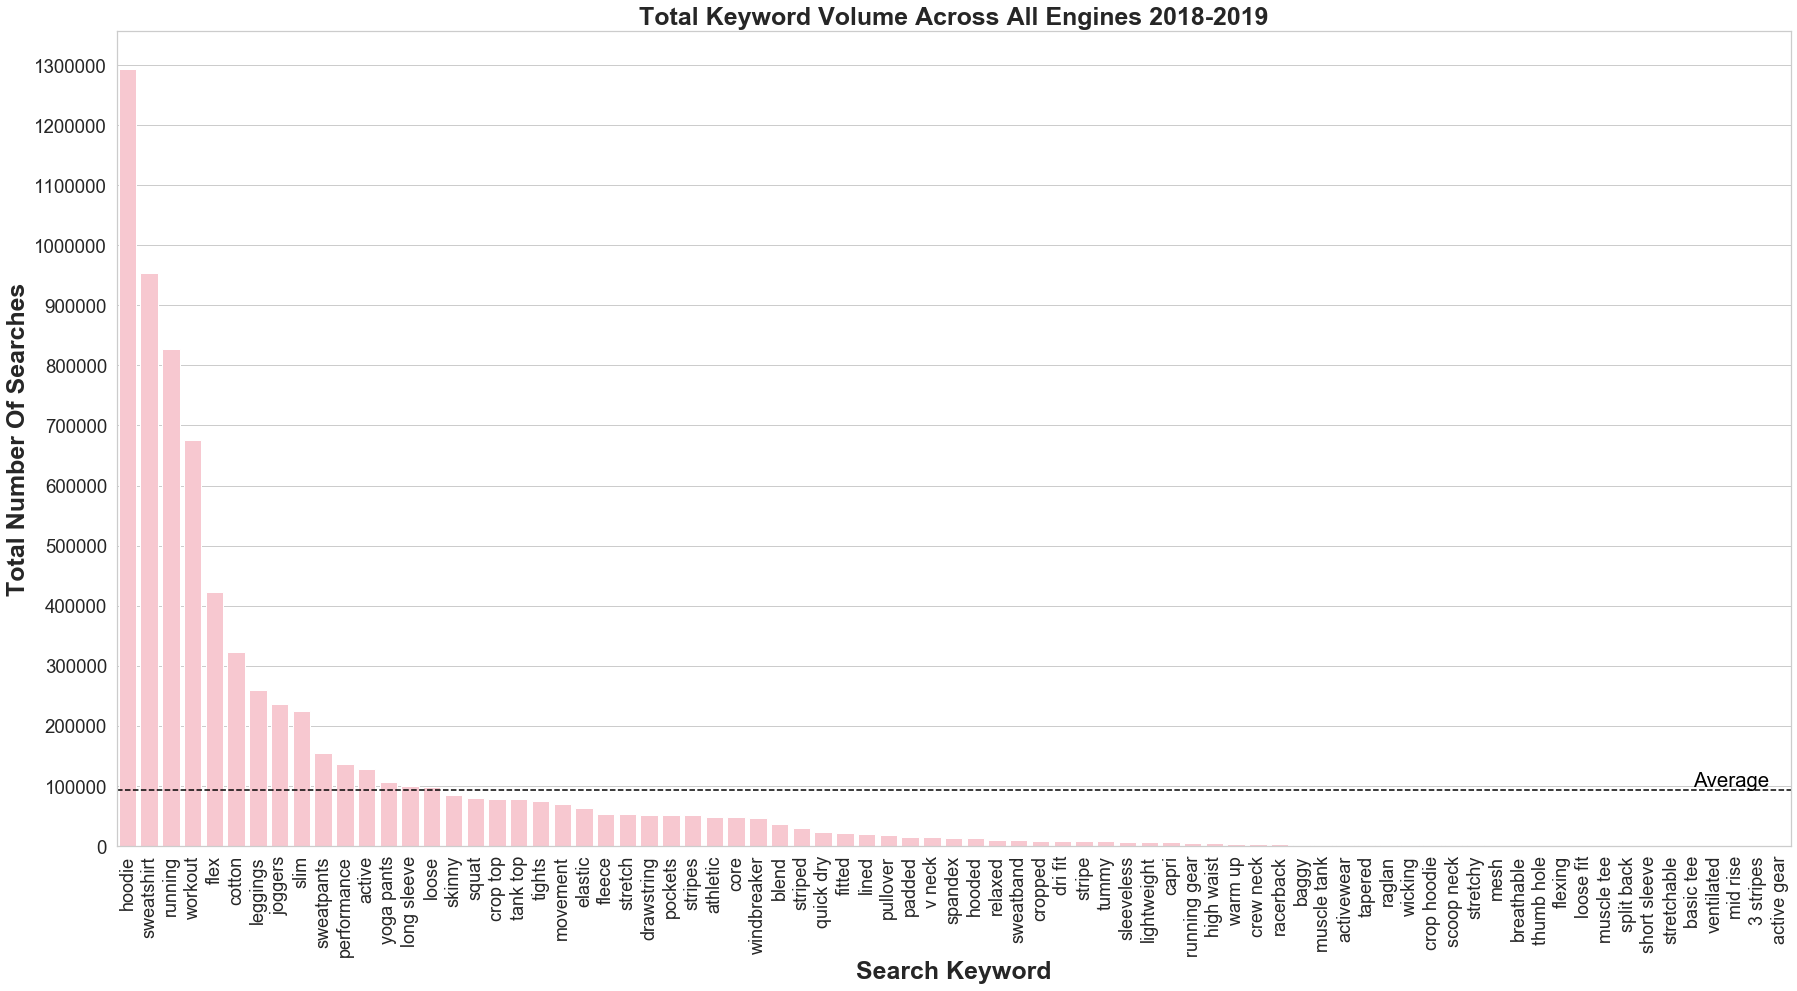

In [320]:
#barplot of TOTAL keyword volumes across all 3 engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="total_volume_all_engines", ci=None, color='pink', data=total_engines)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Total Number Of Searches', fontsize=25, weight = 'bold')
plt.title('Total Keyword Volume Across All Engines 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(93199.44, ls='--', color='black')
ax.text(72,100000, "Average", color='black')
plt.show()

___

### 9. Wordclouds for athleisure search volume

#### Wordcloud for Google athleisure search volume

In [88]:
word_cloud_google = df_unique_keywords_google.drop('engine', axis=1)
word_cloud_google = word_cloud_google.rename(columns={"keyword": "keyword", "avg_volume_for_last_12_months": "volume"})
word_cloud_google

,keyword,volume
0,yoga pants,65
1,sweatpants,62
2,sweatshirt,288
3,crew neck,29
4,thumb hole,1
5,pullover,19
6,fleece,62
7,joggers,110
8,hoodie,157
9,hooded,35


In [105]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

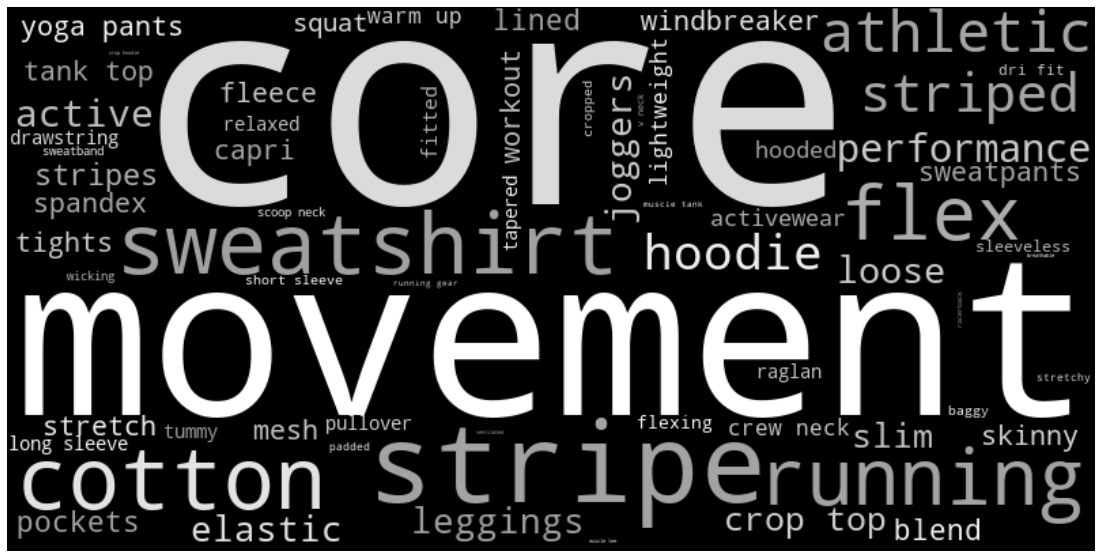

In [171]:
d = {}
for keyword, volume in word_cloud_google.values:
    d[keyword] = volume

wc = WordCloud(width=800, height=400)
plt.figure(figsize=(20,10))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_google.jpg")

#### Wordcloud for YouTube athleisure search volume

In [116]:
word_cloud_youtube = df_unique_keywords_youtube.drop('engine', axis=1)
word_cloud_youtube = word_cloud_youtube.rename(columns={"keyword": "keyword", "avg_volume_for_last_12_months": "volume"})
word_cloud_youtube

,keyword,volume
0,yoga pants,1031
1,sweatpants,1785
2,sweatshirt,69710
3,thumb hole,1
4,pullover,14
5,fleece,24
6,hoodie,76026
7,hooded,29
8,capri,2
9,muscle tee,1


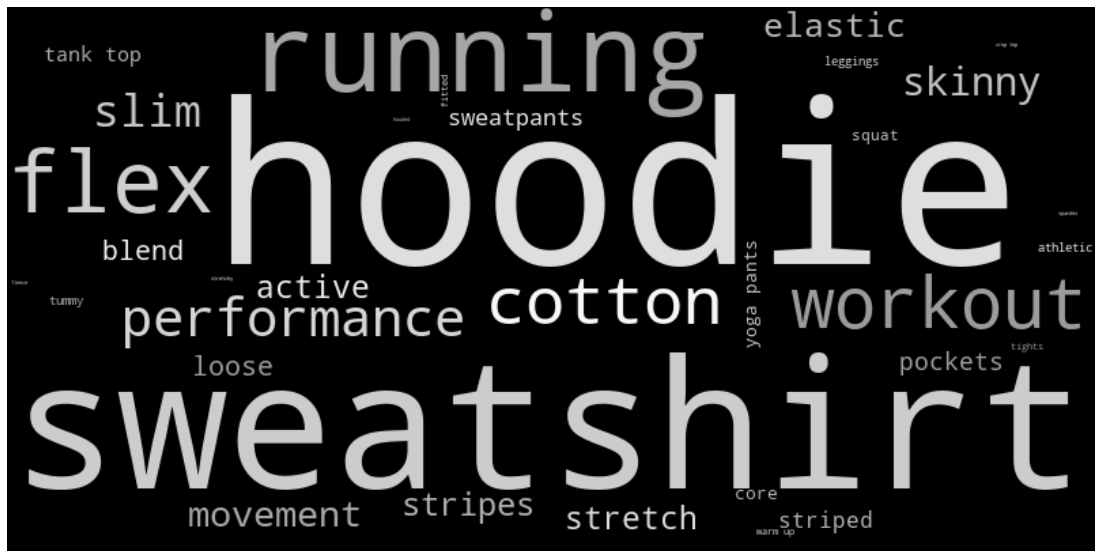

In [321]:
d = {}
for keyword, volume in word_cloud_youtube.values:
    d[keyword] = volume

wc = WordCloud(width=800, height=400)
plt.figure(figsize=(20,10))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_youtube.jpg")

#### Wordcloud for Amazon athleisure search volume

In [118]:
word_cloud_amazon = df_unique_keywords_amazon.drop('engine', axis=1)
word_cloud_amazon = word_cloud_amazon.rename(columns={"keyword": "keyword", "avg_volume_for_last_12_months": "volume"})
word_cloud_amazon

,keyword,volume
0,yoga pants,7731
1,sweatpants,10977
2,sweatshirt,9553
3,crew neck,180
4,thumb hole,33
5,pullover,1442
6,fleece,4317
7,joggers,19603
8,hoodie,31552
9,hooded,974


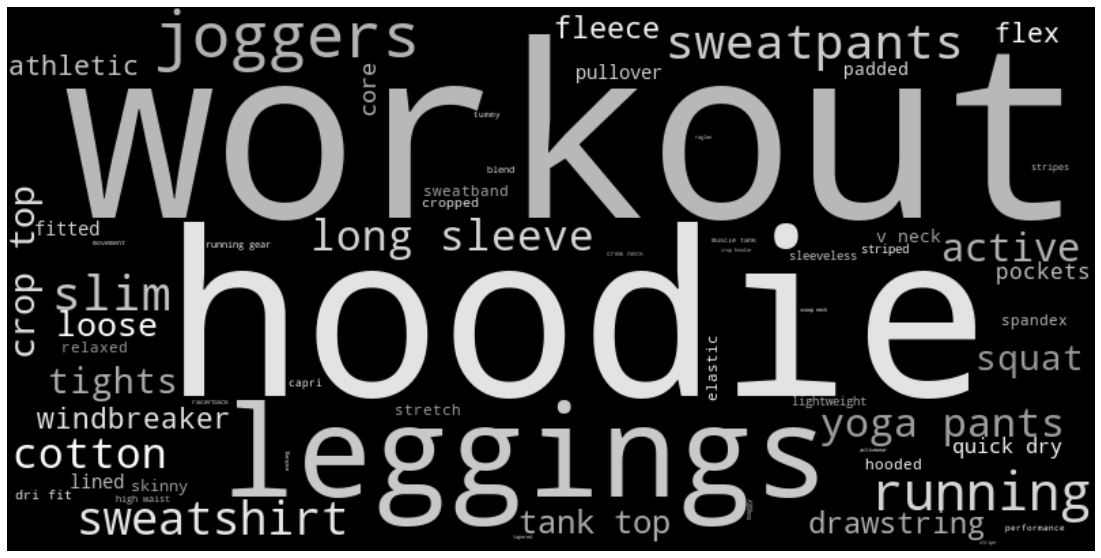

In [322]:
d = {}
for keyword, volume in word_cloud_amazon.values:
    d[keyword] = volume
    
wc = WordCloud(width=800, height=400)
plt.figure(figsize=(20,10))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_amazon.jpg")

In [324]:
word_cloud_total

,keyword,total_volume_all_engines
8,hoodie,1292830.0
2,sweatshirt,954622.0
64,running,827811.0
55,workout,675692.0
28,flex,422286.0
38,cotton,322339.0
15,leggings,260223.0
7,joggers,236558.0
42,slim,224540.0
1,sweatpants,153896.0


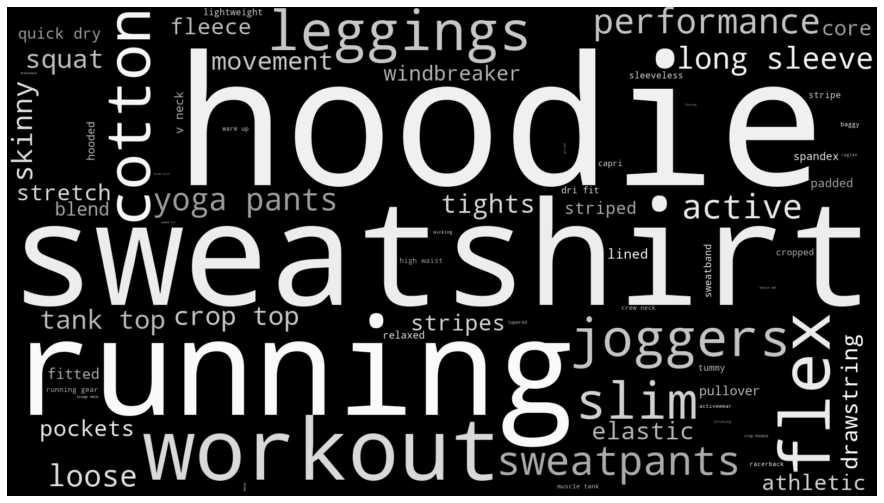

In [361]:
word_cloud_total = total_engines

d = {}
for keyword, total_volume_all_engines in word_cloud_total.values:
    d[keyword] = total_volume_all_engines
    
wc = WordCloud(width=1600, height=900)
plt.figure(figsize=(16,9))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_total.jpg")

___

### 10. PDF and CDF for athleisure keywords having a particular total search volume

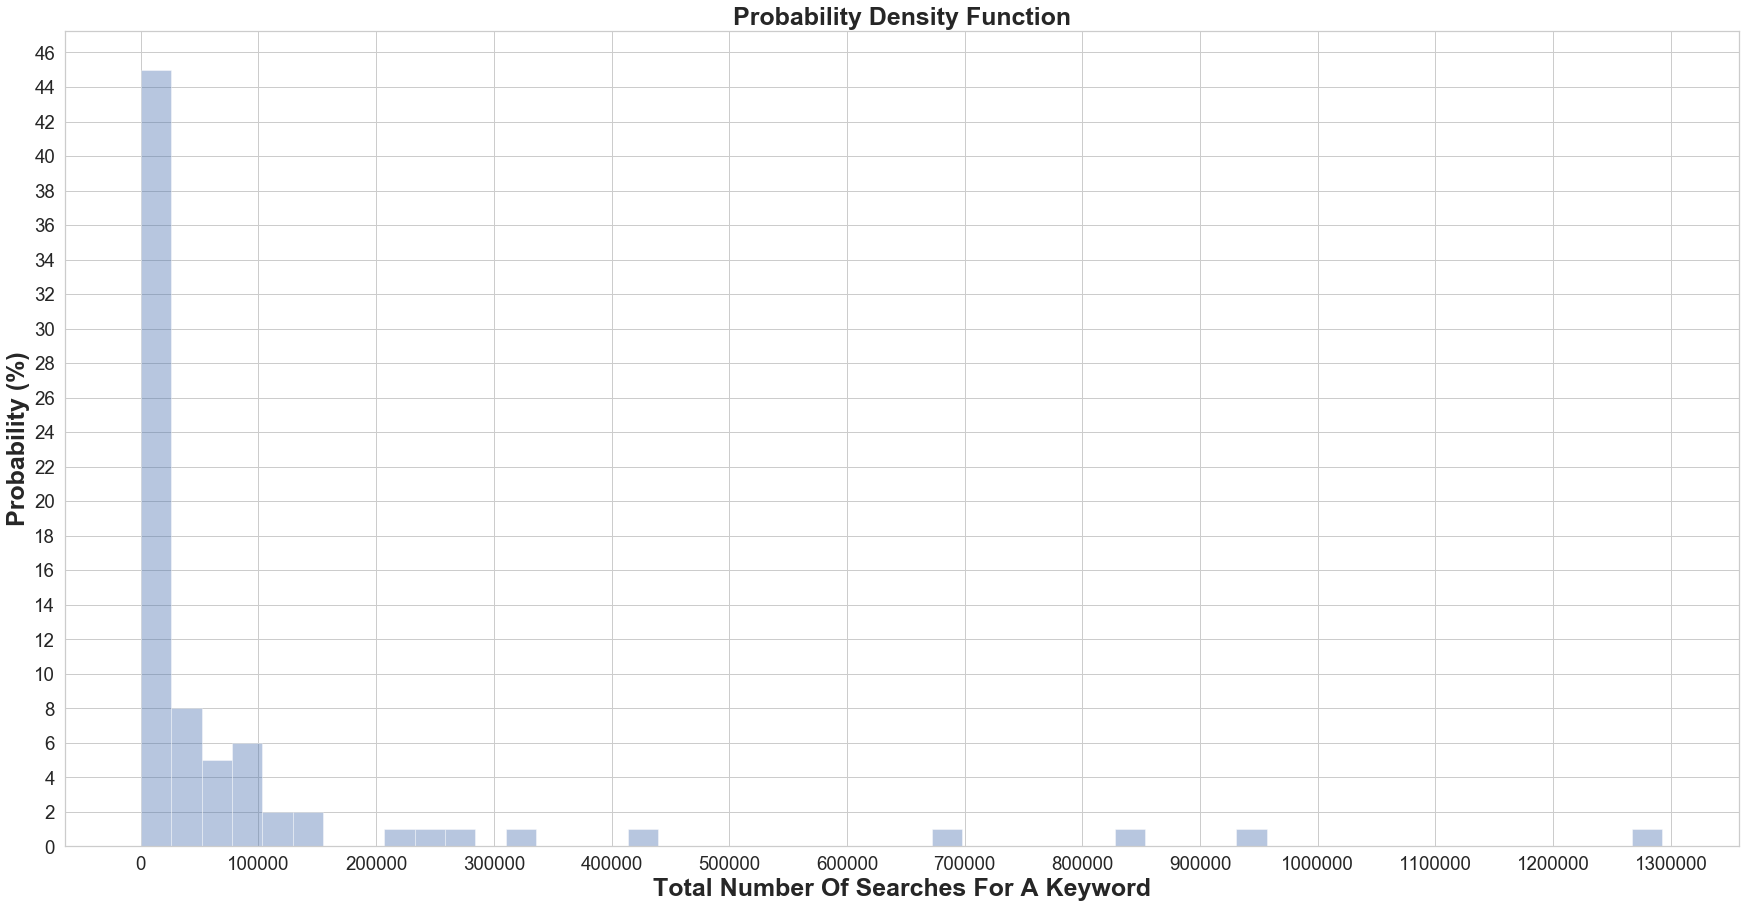

In [404]:
#see Probability Density Function of total volume across all engines

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
sns.distplot(total_engines.total_volume_all_engines, kde=False, bins=50);
plt.xlabel('Total Number Of Searches For A Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Probability (%)', fontsize=25, weight = 'bold')
plt.title('Probability Density Function', fontsize=25, weight = 'bold')
plt.show()

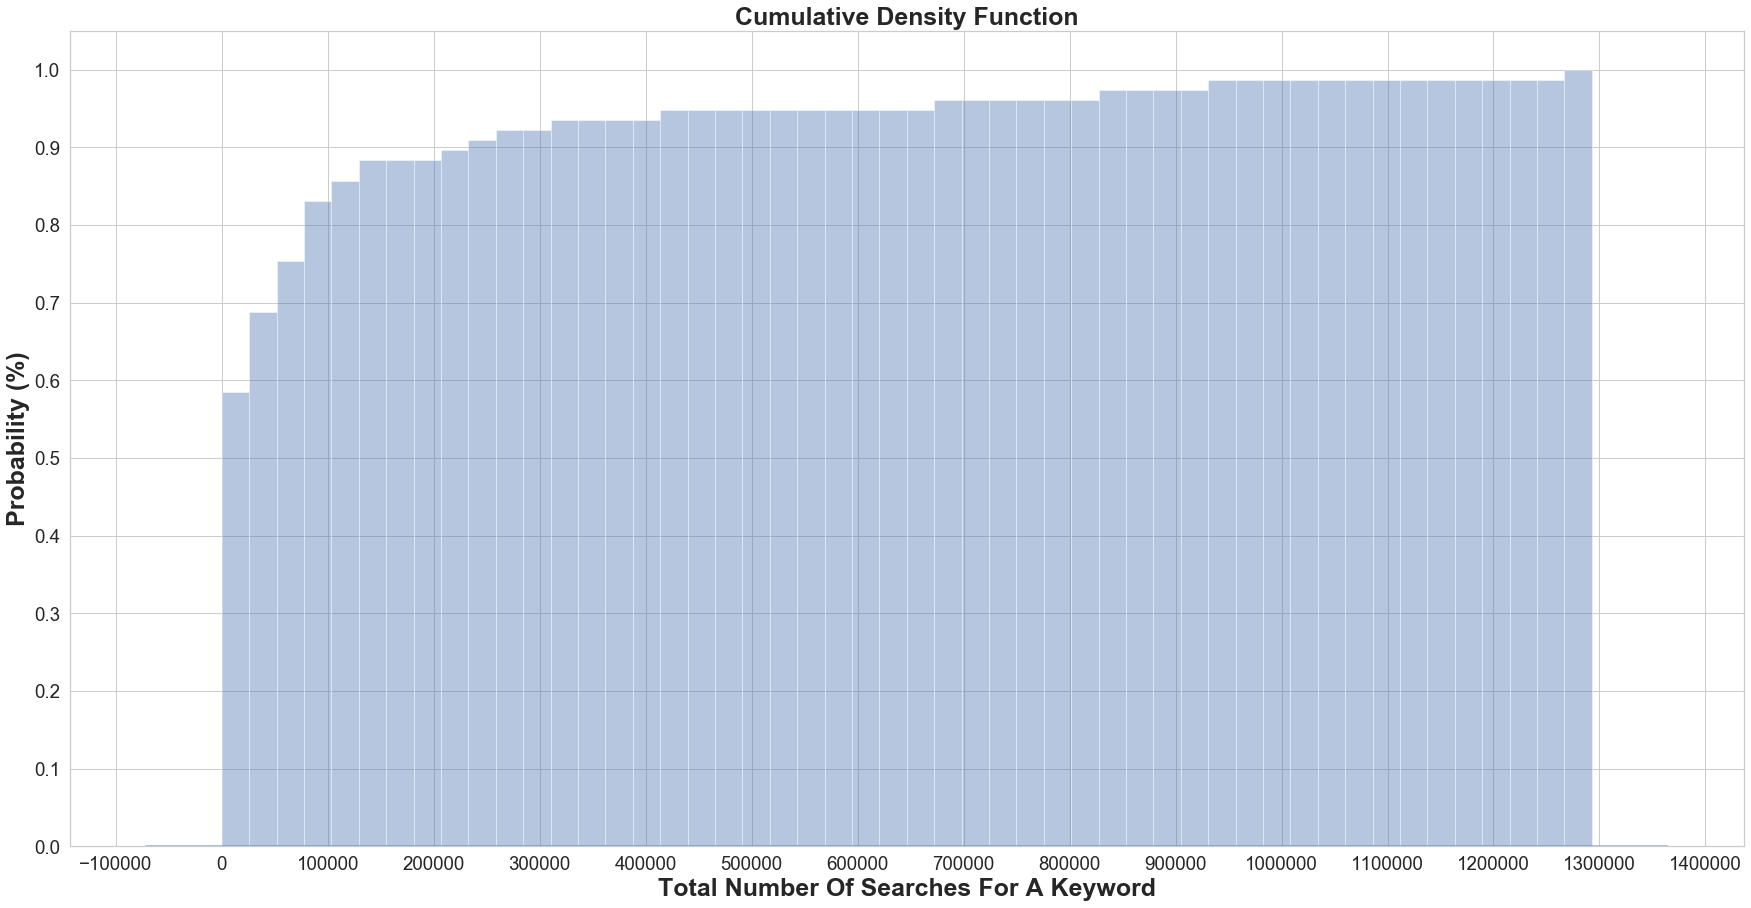

In [403]:
#see Cumulative Distribution Function of total volume across all engines

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
sns.distplot(total_engines.total_volume_all_engines, hist_kws={'cumulative': True}, bins=50)
plt.xlabel('Total Number Of Searches For A Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Probability (%)', fontsize=25, weight = 'bold')
plt.title('Cumulative Density Function', fontsize=25, weight = 'bold')
plt.show()